In [28]:
from __future__ import absolute_import, division, print_function

import os
import matplotlib.pyplot as plt
import random 
import tensorflow as tf
import numpy as np
import math

In [29]:
#find all values greater than a certain value
def findGreater(mat,val):
    arr = np.array([])
    for i in range(mat.shape[0]): #xaxis
        for j in range(mat.shape[1]): #yaxix
            if(mat[i,j] > val):
                arr = np.append(arr,mat[i,j])
                
    return arr

In [30]:
"""Def Generate neutrino 
Random origin (x,y)
Random direction (dx, dy) or (one angles)
Random energy (0 to 1) or (10 to 300 nanoseconds)
Random time
(make code adjustable)
We want to know how fast the neutrino is"""
def generateNeutrino():
    x = random.uniform(0,10)
    y = random.uniform(0,10)
    angle = random.vonmisesvariate(0, 0)
    energy = random.random();
    time = random.randint(10,300)

    return x, y, angle, energy, time

In [56]:
def generateSignal(x,y,angle,energy,time):
    nodes = 10
    x_arr = np.linspace(0,nodes,nodes + 1)
    y_arr = np.linspace(0,nodes,nodes + 1)
    #10 by 10 grid which is the VICE CUBE
    
    #using MeshGrid
    mesh_x, mesh_y = np.meshgrid(x_arr, y_arr)

    #find distance of each sensor to the origion using euclidean distance formula
    x_sq = mesh_x - x
    y_sq = mesh_y - y
    x_sq = np.power(x_sq,2)
    y_sq = np.power(y_sq,2)
    distance = np.sqrt(x_sq + y_sq)
    #distance = np.round(distance,1)
    
    #find charge
    #charge formula: C = (maxDistance - distance_to_each_node)^2 / maxDistance
    maxDistance = math.sqrt((nodes * nodes) + (nodes * nodes))
    charge = np.power((maxDistance - distance),2) / pow(maxDistance,2)
    #charge = np.round(charge,1);
    
    
    #based on the angle and the origin create a line (data fit) that would simulate a neutrino path
    return charge

In [73]:
#decompose signal function
"""" function to decompose the signal to create a training vector and a training label
def decomposeSignal():
    """
#plan is to use have a vector of which sensors detected the neutrino and then have a vector for distance, charge
#then use that as the training data

def decomposeSignal(charge,val):
    x_i, y_i = np.where(charge > val)
    c_i = findGreater(charge,val)
    
    output = np.array([x_i,y_i,c_i])
    output = np.transpose(output)
    print(output)
    print(type(x_i), type(y_i), type(c_i))
    return output

def trainingVector():
    trainVec = np.array([])
    trainLabel_x = np.array([])
    trainLabel_y = np.array([])

    for i in range(10):
        x_o,y_o,angle,energy,time = generateNeutrino();
        charge = generateSignal(x,y,angle,energy,time)
        output = decomposeSignal(charge,0.75)
        
        trainVec = np.append(trainVec,output)
        trainLabel_x = np.append(trainLabel_x, x_o)
        trainLabel_y = np.append(trainLabel_y, y_o)
        
    print(trainVec)
    

x
 [[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
 [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
 [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
 [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
 [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
 [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
 [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
 [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
 [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
 [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
 [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]]
y
 [[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.]
 [ 3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.]
 [ 4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.]
 [ 5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.]
 [ 6.  6.  6.  6.  6.  6.  6.  6.  6.  6.  6.]
 [ 7.  7.  7.  7.  7.  7.  7.  7.  7.  7.  7.]
 [ 8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.]
 [ 9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.]
 [10. 

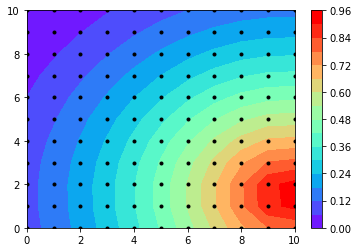

x y angle energy time
9.685081821458818 1.5174781744581445 3.176086965563027 0.20472943098931085 67
distance
 [[ 9.80324181  8.81665391  7.83346811  6.85514836  5.88412231  4.92470625
   3.98529397  3.0842186   2.26765093  1.66495559  1.54981078]
 [ 9.69889651  8.70048446  7.70248442  6.70508036  5.70858467  4.71357352
   3.72123792  2.73449228  1.7627491   0.85855737  0.60576986]
 [ 9.69709427  8.69847536  7.70021493  6.70247315  5.70552212  4.70986401
   3.71653809  2.72809305  1.75280577  0.83795251  0.57619508]
 [ 9.79789165  8.81070469  7.82677159  6.84749516  5.87520436  4.91404748
   3.97211518  3.06717058  2.24440899  1.63315892  1.51560035]
 [ 9.99818606  9.03291541  8.07610037  7.13114532  6.20347241  5.30216053
   4.44328062  3.6568537   3.00040253  2.57531585  2.50241645]
 [10.29217024  9.35727549  8.43732427  7.53778994  6.66694185  5.83763222
   5.07028464  4.39745638  3.86878004  3.54926688  3.49673158]
 [10.67210438  9.77362001  8.89682441  8.04880866  7.23969317  6.484

In [74]:
if __name__== "__main__":
    x,y,angle,energy,time = generateNeutrino();
    mesh_x, mesh_y, distance, charge = generateSignal(x,y,angle,energy,time)
    print("x\n", mesh_x)
    print("y\n", mesh_y)

    plt.plot(mesh_x,mesh_y, marker='.', color='k', linestyle='none')
    
    
    CS = plt.contourf(mesh_x, mesh_y,charge, 15, cmap=plt.cm.rainbow,
                  vmax=charge.max(), vmin=0)
    plt.colorbar()  
    plt.show()

    print("x y angle energy time")
    print(x,y,angle,energy,time)
    
    print("distance\n", distance)
    print("charge\n", charge)
    
    decomposeSignal(charge,0.8)
    #trainingVector()